In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from cmapPy.pandasGEXpress.parse import parse
from GSVA import gsva, gmt_to_dataframe

import cmapPy
import seaborn as sns
import matplotlib.pyplot as plt

# cmapPy.pandasGEXpress.parse.parse

## Task -1
### Plotting the dimensional reduced data 

In [3]:
# reading the daat
gctoo_object = parse("PAAD.gct")

In [4]:
# loading the datamatrix from GCToo object
data_df= gctoo_object.data_df.T

# checking the Null values for each information
na_info = data_df.isnull().sum()

na_info[na_info != 0].describe()

count    4367.000000
mean       30.903137
std        36.570798
min         1.000000
25%         3.000000
50%        13.000000
75%        50.500000
max       128.000000
dtype: float64

In [5]:
# filling the blanks with NA's
# Due to shortage of time any other option of fillinf blanks not tried
data_df = data_df.apply(lambda x: x.fillna(np.mean(x)),axis=0)

In [16]:
# merging information of type of tumour using column meta data

merged_df = data_df.merge(gctoo_object.col_metadata_df['histological_type_other'], left_index=True, right_index=True)

In [25]:

# cleaning the tumour type to two classes only as information is not provided completely
# assumption is that it default is adenocarcinoma else neuroendocrine in presence of same in column
merged_df['histological_type_other'] = merged_df['histological_type_other'].astype(str).apply(lambda x:
                                                                                              'neuroendocrine' if 'neuroendocrine' in str(x).lower() 
                                                                                              else 'adenocarcinoma')

In [17]:
# scalling the each gene values before performing PCA
merged_df_scaled = StandardScaler().fit_transform(merged_df.drop(columns=['histological_type_other']))

In [18]:
# performing PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(merged_df_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [23]:
# assigning index to merge the data
principalDf.index = merged_df.index

result_df = principalDf.merge(merged_df['histological_type_other'], left_index=True, right_index=True)

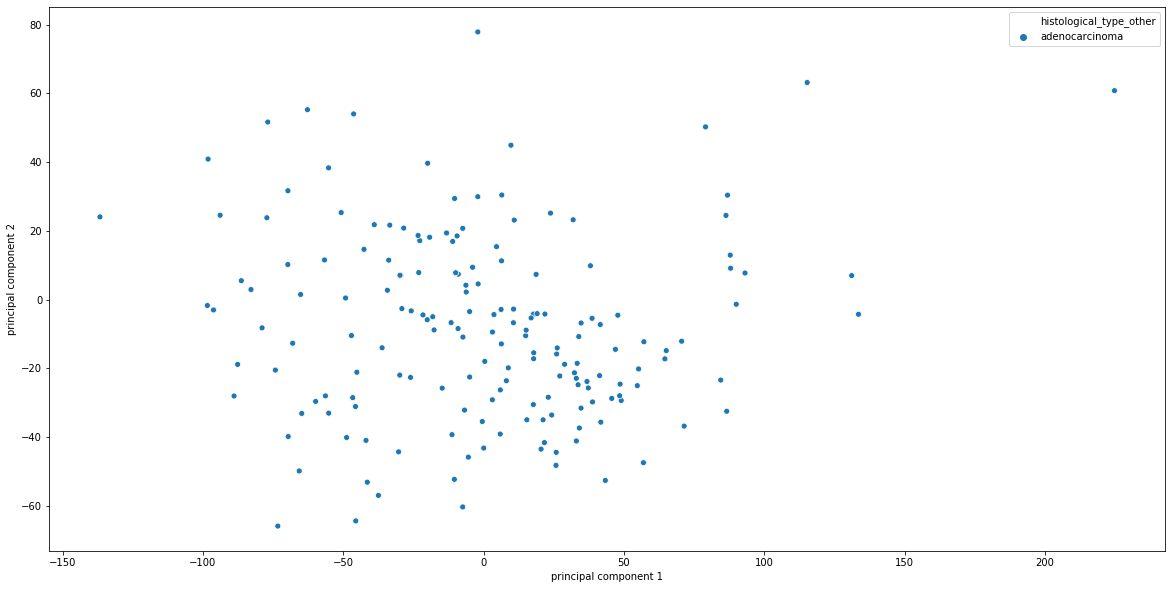

In [32]:
# plotting the PC's with only adenocarcinoma tumour
plt.figure(figsize=(20,10))
sns.scatterplot(x='principal component 1', y='principal component 2', 
                hue= 'histological_type_other', data=result_df[result_df['histological_type_other']=='adenocarcinoma'])

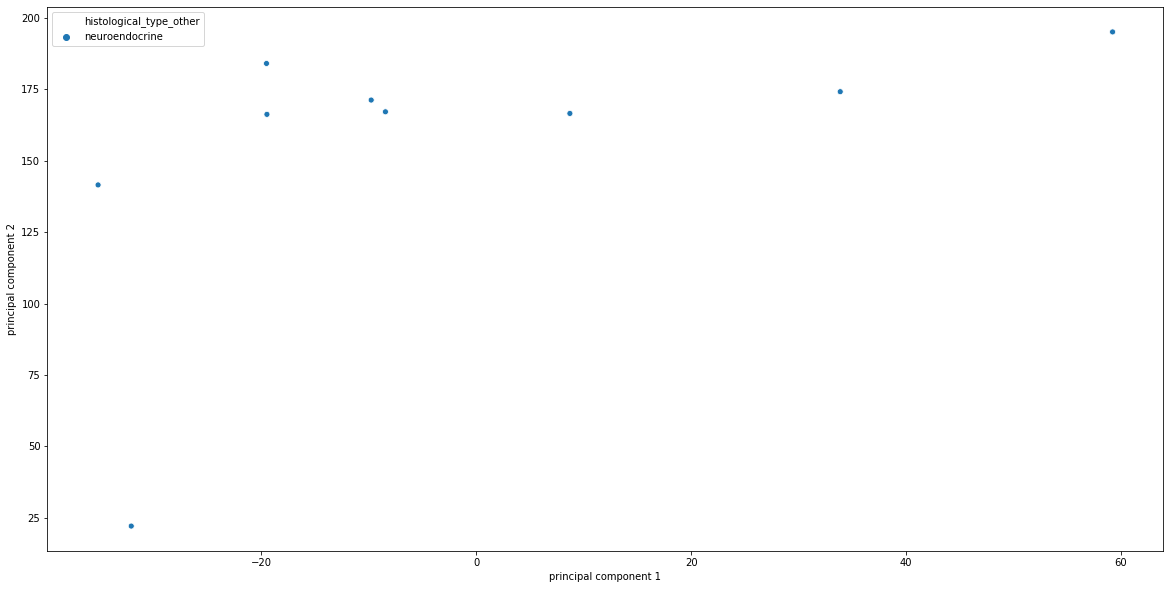

In [31]:
# plotting the PC's with only neuroendocrine tumour
plt.figure(figsize=(20,10))
sns.scatterplot(x='principal component 1', y='principal component 2', 
                hue= 'histological_type_other', data=result_df[result_df['histological_type_other']=='neuroendocrine'])

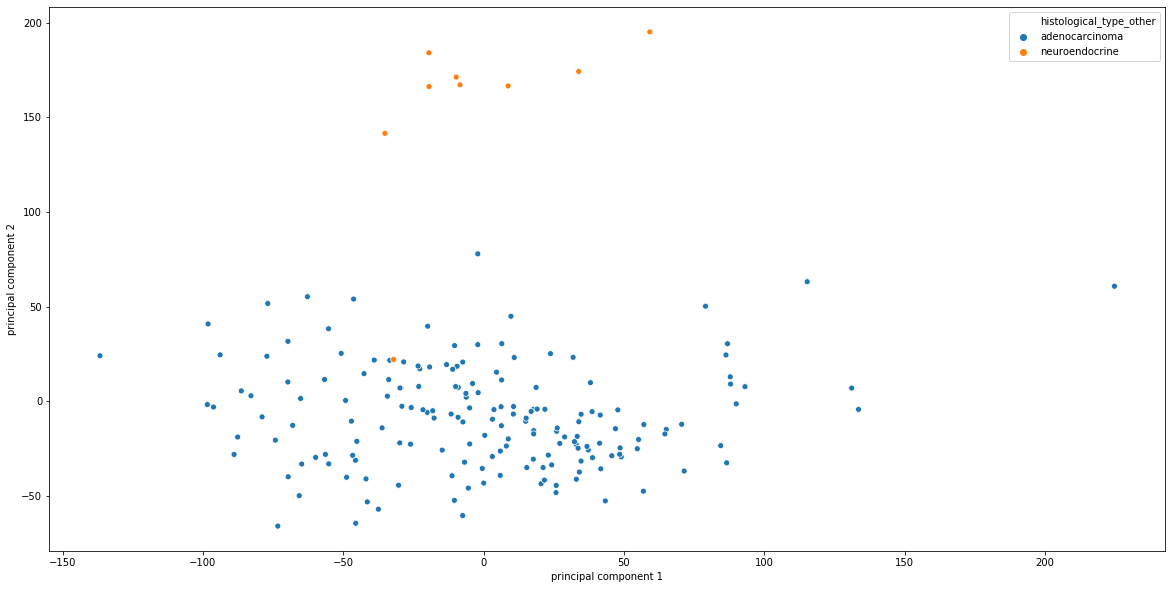

In [30]:
# plotting the PC's with both classes
plt.figure(figsize=(20,10))
sns.scatterplot(x='principal component 1', y='principal component 2', 
                hue= 'histological_type_other', data=result_df)

In [29]:
result_df

,principal component 1,principal component 2,histological_type_other
cid,,,
aab1-Primary solid Tumor,26.019540,-15.782160,adenocarcinoma
aab4-Primary solid Tumor,6.315816,-12.856530,adenocarcinoma
aab6-Primary solid Tumor,33.011656,-22.852525,adenocarcinoma
aab8-Primary solid Tumor,5.944507,-26.241588,adenocarcinoma
aab9-Primary solid Tumor,-1.961428,4.592999,adenocarcinoma
...,...,...,...
a89d-Solid Tissue Normal,-11.592133,-6.675813,adenocarcinoma
a89d-Primary solid Tumor,-7.377109,-10.862223,adenocarcinoma
a8sy-Primary solid Tumor,34.713353,-31.524508,adenocarcinoma


### What does the analysis say about the general behavior of the different samples?


#### As we can observe that the adenocarcinoma tumors are not high in PC2 comparing to neuroendocrine tumour


### Are the neuroendocrine tumors clearly separable from the adenocarcinoma tumors?



#### Yes,  plotting both classes shows that 

### What can be said about the variance of the PCA?

#### Variance explained by two PC's is 25%

In [39]:
print("Fraction of Variance explained by two PC's {0}".format(pca.explained_variance_ratio_.sum()))

Fraction of Variance explained by two PC's 0.24949271546264862


### Task - 2


####   Understand the effect of Interferons in Pancreatic Adenocarcinoma

when trying to implment this, the documentation was not proper for the package 


In [2]:
# defining gene_df dummy one 
gene_set = pd.DataFrame({'desscrition':['website'],'name':['type1'], 'member':['IFIT1 IFI44 IFIT3 MX2']})

In [9]:
# expression DF is data_df of GCtoo object
pathways_df = gsva(gctoo_object.data_df, gene_set)

FileNotFoundError: [WinError 2] The system cannot find the file specified